<a href="https://colab.research.google.com/github/VedanshKesarwani/Image_Classifier_Project_CNN_deepLearning_model/blob/main/cats_v_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive (1).zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/content/dogs-vs-cats"

# Data generators with validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80% train, 20% test

train_set = datagen.flow_from_directory(
    data_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    subset='training'   # set as training data
)

test_set = datagen.flow_from_directory(
    data_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    subset='validation'   # set as validation data
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:


model = Sequential()

# Convolution + Pooling
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_set,
                    steps_per_epoch=len(train_set),
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=len(test_set))

# Evaluate Model
loss, acc = model.evaluate(test_set)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 76s 294ms/step - accuracy: 0.5432 - loss: 0.6882 - val_accuracy: 0.6770 - val_loss: 0.6066
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 69s 278ms/step - accuracy: 0.6872 - loss: 0.5904 - val_accuracy: 0.7200 - val_loss: 0.5530
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 282ms/step - accuracy: 0.7409 - loss: 0.5087 - val_accuracy: 0.7270 - val_loss: 0.5227
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 284ms/step - accuracy: 0.7914 - loss: 0.4471 - val_accuracy: 0.7800 - val_loss: 0.4561
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 85s 296ms/step - accuracy: 0.8170 - loss: 0.4111 - val_accuracy: 0.7965 - val_loss: 0.4310
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 286ms/step - accuracy: 0.8335 - loss: 0.3698 - val_accuracy: 0.7955 - val_loss: 0.4442
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 76s 303ms/step - accuracy: 0.8490 - loss: 0.3465 - val_accuracy: 0.7875 - val_loss: 0.4650
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 78s 286ms/step - accuracy: 0.8890 - loss: 0

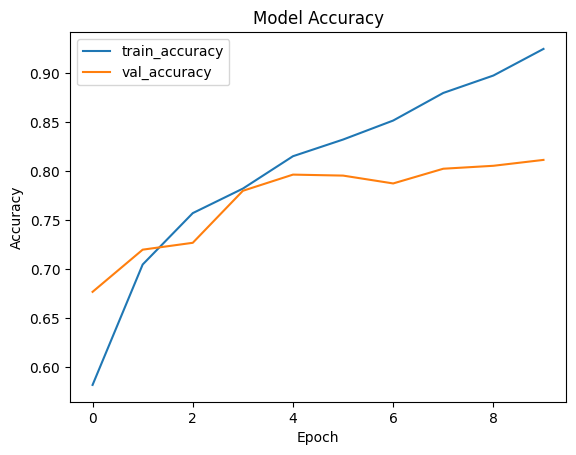

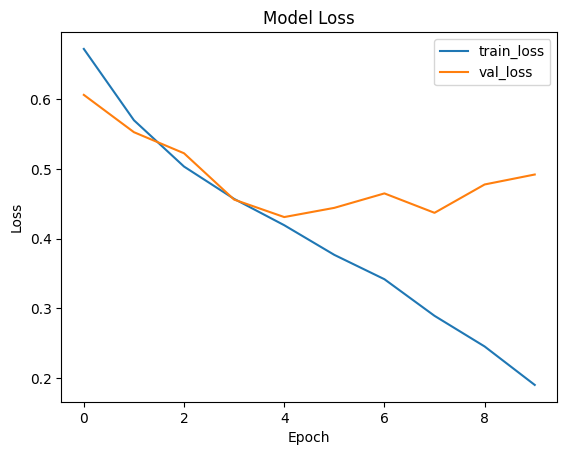

In [ ]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save("cat_dog_model.keras")

In [ ]:
!pip install gradio

In [ ]:

import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


model = load_model("cat_dog_model.keras")

def predict(img):
    img = img.resize((64,64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)[0][0]


    dog_prob = float(prediction)
    cat_prob = 1 - dog_prob

    return {"🐱 Cat": cat_prob, "🐶 Dog": dog_prob}


interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil", label="Upload an Image"),
    outputs=gr.Label(num_top_classes=2, label="Prediction Confidence"),
    title="🐱🐶 Cat vs Dog Classifier",
    description="""
    <center>
    <h3 style='color:#2E86C1;'>Upload a picture of a Cat or Dog</h3>
    <p>Our trained CNN will classify it and show confidence percentages.</p>
    </center>
    """,
    live=False
)


interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://712f71695447daf745.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
